# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайн: 3 марта 23:59</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(low=0, high=100, size=(10, 10))
print(A)

[[55  3 66 24 62  1 99 16  2 34]
 [38 76 78 73 17 40 64 61 87  1]
 [45 81 29 49 25 18 51 71 76 28]
 [17 19 96 12 29 37 71 28 59  4]
 [40 30 23 29 16 25 10 42 68 57]
 [11 71 69 10 35 21 31 66 97 47]
 [15 11 42 72 14 58 56 77  7 26]
 [ 8 74 22 30 42 39 54 96 14 81]
 [58 15 10 47 95 71 71 72 58 59]
 [77  1 35 60 93 71 68 33 34 20]]


In [3]:
# Посчитайте средние значения в матрице по столбцам

print(np.mean(A, axis=0))

[36.4 38.1 47.  40.6 42.8 38.1 57.5 56.2 50.2 35.7]


In [4]:
# Транспонируйте матрицу A

print(A.T)

[[55 38 45 17 40 11 15  8 58 77]
 [ 3 76 81 19 30 71 11 74 15  1]
 [66 78 29 96 23 69 42 22 10 35]
 [24 73 49 12 29 10 72 30 47 60]
 [62 17 25 29 16 35 14 42 95 93]
 [ 1 40 18 37 25 21 58 39 71 71]
 [99 64 51 71 10 31 56 54 71 68]
 [16 61 71 28 42 66 77 96 72 33]
 [ 2 87 76 59 68 97  7 14 58 34]
 [34  1 28  4 57 47 26 81 59 20]]


In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

print(A * A.T)

[[3025  114 2970  408 2480   11 1485  128  116 2618]
 [ 114 5776 6318 1387  510 2840  704 4514 1305    1]
 [2970 6318  841 4704  575 1242 2142 1562  760  980]
 [ 408 1387 4704  144  841  370 5112  840 2773  240]
 [2480  510  575  841  256  875  140 1764 6460 5301]
 [  11 2840 1242  370  875  441 1798 2574 6887 3337]
 [1485  704 2142 5112  140 1798 3136 4158  497 1768]
 [ 128 4514 1562  840 1764 2574 4158 9216 1008 2673]
 [ 116 1305  760 2773 6460 6887  497 1008 3364 2006]
 [2618    1  980  240 5301 3337 1768 2673 2006  400]]


In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = np.dot(A, A)
print(B)

[[13355 10463 15297 16611 12244 12744 20220 19516 13305 12066]
 [17420 23469 25792 22638 21203 20787 32320 33261 28341 18451]
 [16786 18582 22094 20961 20863 19734 29395 28469 22389 17011]
 [12767 16738 14088 16819 14031 14134 20033 24778 19699 14400]
 [14602 11364 14543 13935 19202 14745 21579 18816 16202 13051]
 [18447 20476 16848 21764 21991 20375 26246 29800 24815 18214]
 [ 9419 16634 19328 13302 13610 14037 20940 23391 17765 14135]
 [15488 20018 20830 20926 18862 19964 25119 28437 21823 16935]
 [19138 17946 24095 20544 24484 21676 29694 31047 25176 23487]
 [16165 15833 23595 16447 18807 15848 26227 25562 23242 19324]]


### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [7]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [8]:
from sklearn.model_selection import train_test_split

all_data, delayed_data = train_test_split(all_data, test_size=0.2, random_state=42)

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [9]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [11]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [12]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
train_test_split(two_class_feature_matrix, two_class_labels, test_size=0.2, random_state=42)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [13]:
lr_clf = LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score, f1_score

lr_clf.fit(train_feature_matrix, train_labels)
y_pred = lr_clf.predict(test_feature_matrix)
print("Accuracy: ", accuracy_score(test_labels, y_pred))
print("F1 score: ", f1_score(test_labels, y_pred))

Accuracy:  0.7631195335276968
F1 score:  0.7234042553191488


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [15]:
from sklearn.preprocessing import MinMaxScaler

lr_clf = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=5000)

# Разобьём данные на часть для обучения и валидации.

train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

# Отнормируем данные по тестовой части.

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_feature_matrix.astype(float))
train_feature_matrix = min_max_scaler.transform(train_feature_matrix.astype(float))
test_feature_matrix = min_max_scaler.transform(test_feature_matrix.astype(float))

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [16]:
# Ваш код здесь
# Отмечу, что здесь сказано, что мы тестим для C именно из  np.linspace(0.01, 1, 10), а не  np.logspace!

from sklearn.model_selection import GridSearchCV

params = {
    'C': np.linspace(0.01, 1, 10),
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(estimator=lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

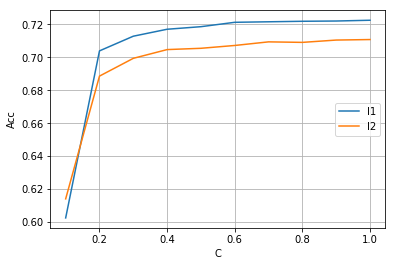

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(np.linspace(0.1, 1, 10), grid.cv_results_['mean_test_score'][::2], label='l1')
plt.plot(np.linspace(0.1, 1, 10), grid.cv_results_['mean_test_score'][1::2], label='l2')
plt.grid()
plt.xlabel('C')
plt.ylabel('Acc')
plt.legend(loc=5)
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [18]:
print('The best C:', grid.best_params_['C'])
print('The best penalty:', grid.best_params_['penalty'])

The best C: 1.0
The best penalty: l1


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [19]:
best_lr_clf = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'])
best_lr_clf.fit(train_feature_matrix, train_labels)
y_pred_prob = best_lr_clf.predict_proba(test_feature_matrix)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [20]:
# Ваш код здесь
# Если честно, формулировка ооочень расплывчатая, поэтому я сделал так, как это понимаю я.
# Впредь, пожалуйста, формулируйте задание более чётко.
print("Mean distributions:", y_pred_prob.mean(axis=0))

print("Frequency:", [train_labels.tolist().count(i) / len(train_labels) for i in range(1, 8)])

Mean distributions: [0.36724782 0.49593604 0.05828338 0.00534184 0.01839187 0.03130588
 0.02349317]
Frequency: [0.3775, 0.4790625, 0.058125, 0.00546875, 0.01734375, 0.03109375, 0.03140625]


Из анализа числовых значений видно, что данные почти совпадают.

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params_knn = {
    'n_neighbors': np.array(range(1, 11)),
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='accuracy', cv=5)
grid.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
grid.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

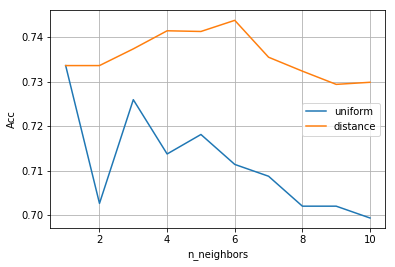

In [23]:
plt.plot(np.array(range(1, 11)), grid.cv_results_['mean_test_score'][::2], label='uniform')
plt.plot(np.array(range(1, 11)), grid.cv_results_['mean_test_score'][1::2], label='distance')
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('Acc')
plt.legend(loc=5)
plt.show()

Из приведённых выше операций, очевидно, что использование "distance" является более предпочтительным.

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [24]:
# Ваш код здесь
params_knn = {
    'n_neighbors': [i for i in range(1, 11)],
    'weights': ['distance']
}
grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='accuracy', cv=5).fit(train_feature_matrix, train_labels)

In [25]:
grid_knn.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

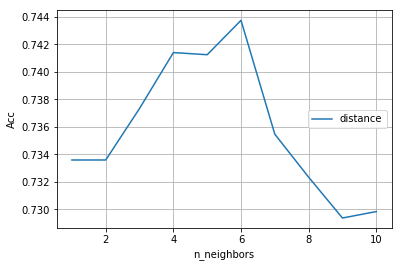

In [26]:
plt.plot(np.array(range(1, 11)), grid_knn.cv_results_['mean_test_score'], label='distance')
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('Acc')
plt.legend(loc=5)
plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [27]:
best_knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'], weights='distance')
best_knn.fit(train_feature_matrix, train_labels)
y_pred_knn = best_knn.predict_proba(test_feature_matrix)

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [28]:
labels_dealyed = all_data[delayed_data.columns[-1]].values
feature_matrix_delayed = all_data[delayed_data.columns[:-1]].values

In [29]:
feature_matrix_delayed_norm = min_max_scaler.transform(feature_matrix_delayed.astype(float))

In [30]:
y_pred_best_knn = best_knn.predict(feature_matrix_delayed_norm)
y_pred_best_log = best_lr_clf.predict(feature_matrix_delayed_norm)

In [31]:
print("Accuracy for knn:", accuracy_score(labels_dealyed, y_pred_best_knn))
print("Accuracy for logistic regression:", accuracy_score(labels_dealyed, y_pred_best_log))

Accuracy for knn: 0.951375
Accuracy for logistic regression: 0.712375


Как видно, knn оказался лучше, чем мультиклассовая логистическая регрессия.